# Libraries and functions

In [46]:
import helper
from helper import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%matplotlib inline

pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

from sklearn.preprocessing import LabelBinarizer

In [47]:
def print_results(model, keras=True):
    """
    Print results of model. MSE and competetion score
    """

    if keras:
        predictions = model.predict(test_X, batch_size = batch_size)
        predictions_train = model.predict(train_X, batch_size = batch_size)
    else:
        predictions = model.predict(test_x)
        predictions_train = model.predict(train_x)
    
    df_predictions = df_test.join(pd.DataFrame(predictions.round()))
    df_predictions_train = df_train.join(pd.DataFrame(predictions_train.round()))
    
    df_predictions.rename(columns={0: 'Prediction'}, inplace=True)
    df_predictions_train.rename(columns={0: 'Prediction'}, inplace=True)

    df_predictions['error'] = df_predictions.apply(lambda df: error_function(df), axis=1)
    df_predictions_train['error'] = df_predictions_train.apply(lambda df: error_function(df), axis=1)

    df_predictions['score'] = df_predictions.apply(lambda df: score_function(df), axis=1)
    df_predictions_train['score'] = df_predictions_train.apply(lambda df: score_function(df), axis=1)

    MSE_all = mean_squared_error(df_predictions['RUL'], df_predictions['Prediction'])
    MSE_train_all = mean_squared_error(df_predictions_train['RUL'], df_predictions_train['Prediction'])
    
    print('{:.2f}'.format(MSE_all))
    print('{:.2f}'.format(MSE_train_all))
    
    MAE_all = mean_absolute_error(df_predictions['RUL'], df_predictions['Prediction'])
    MAE_train_all = mean_absolute_error(df_predictions_train['RUL'], df_predictions_train['Prediction'])
    
    print('{:.2f}'.format(MAE_all))
    print('{:.2f}'.format(MAE_train_all))

    ##################
    
    temp_df = pd.DataFrame(df_predictions.groupby(['dataset_id', 'unit_id'])['cycle'].max()).reset_index()
    df_target = pd.merge(temp_df, df_predictions, how='left', on=('dataset_id', 'unit_id', 'cycle'))

    temp_df = pd.DataFrame(df_predictions_train.groupby(['dataset_id', 'unit_id'])['cycle'].max()).reset_index()
    df_target_train = pd.merge(temp_df, df_predictions_train, how='left', on=('dataset_id', 'unit_id', 'cycle'))
    
    MSE = mean_squared_error(df_target['RUL'], df_target['Prediction'])
    MSE_train = mean_squared_error(df_target_train['RUL'], df_target_train['Prediction'])
    
    print('{:.2f}'.format(MSE))
    print('{:.2f}'.format(MSE_train))
    
    MAE = mean_absolute_error(df_target['RUL'], df_target['Prediction'])
    MAE_train = mean_absolute_error(df_target_train['RUL'], df_target_train['Prediction'])
    
    print('{:.2f}'.format(MAE))
    print('{:.2f}'.format(MAE_train))
    
    score_test = df_target['score'].sum()
    score_train = df_target_train['score'].sum()

    print('{:.2f}'.format(score_test))
    print('{:.2f}'.format(score_train))
    
    return df_predictions, df_predictions_train, df_target, df_target_train

# Load data

In [48]:
datasets = []

RUL_BY_PART = True

path = '/home/rneves/thesis/Turbofan_Engine/' # path to numpy arrays to plot t-sne

df_train = pd.read_pickle(path + 'dataframes/train__1_diff_10')
df_test = pd.read_pickle(path + 'dataframes/test__1_diff_10')

#df_train = pd.read_pickle(path + 'dataframes/df_separated_train')
#df_test = pd.read_pickle(path + 'dataframes/df_separated_test')

if RUL_BY_PART:
    df_train['RUL'] = df_train.apply(lambda r: RUL_by_parts(r, 120), axis=1)
    df_test['RUL'] = df_test.apply(lambda r: RUL_by_parts(r, 120), axis=1)

df_train.sort_values(by=['dataset_id', 'unit_id', 'cycle'], inplace=True)
df_test.sort_values(by=['dataset_id', 'unit_id', 'cycle'], inplace=True)

df_train.reset_index(drop = True, inplace=True)
df_test.reset_index(drop = True, inplace=True)

In [49]:
df_train, df_test = cat_to_continuous_Encoder(df_train, df_test)
#df_train, df_test = cat_to_continuous_Binarizer(df_train, df_test)

df_train.drop((['index']), axis=1, inplace=True)
df_test.drop((['index']), axis=1, inplace=True)

train_x = df_train.drop((['setting 1', 'setting 2', 'setting 3','dataset_id', 'RUL', 'unit_id', 'HDBScan', 'index_diff']), axis=1)
train_y = df_train['RUL'].copy()

#df_test = df_test[df_test['dataset_id'] == 'FD001']

test_x = df_test.drop((['setting 1', 'setting 2', 'setting 3','dataset_id', 'RUL', 'unit_id', 'HDBScan', 'index_diff']), axis=1).fillna(0)
test_y = df_test['RUL'].copy()

In [99]:
number = [2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 20, 21]
length = [10]

sensor_columns = ["sensor {}".format(s) for s in number]
sensor_columns_rolling_mean = ["sensor {}_rolling_mean_{}".format(x, s) for s in length for x in number]
sensor_columns_rolling_std = ["sensor {}_rolling_std_{}".format(x, s) for s in length for x in number]
sensor_columns_rolling_min = ["sensor {}_rolling_min_{}".format(x, s) for s in length for x in number]
sensor_columns_rolling_max = ["sensor {}_rolling_max_{}".format(x, s) for s in length for x in number]
sensor_columns_rolling_median = ["sensor {}_rolling_median_{}".format(x, s) for s in length for x in number]


sensor_columns_diff = ["sensor {}_diff".format(s) for s in number]
sensor_columns_rolling_mean_diff = ["sensor {}_rolling_mean_{}_diff".format(x, s) for s in length for x in number]
sensor_columns_rolling_std_diff = ["sensor {}_rolling_std_{}_diff".format(x, s) for s in length for x in number]
sensor_columns_rolling_min_diff = ["sensor {}_rolling_min_{}_diff".format(x, s) for s in length for x in number]
sensor_columns_rolling_max_diff = ["sensor {}_rolling_max_{}_diff".format(x, s) for s in length for x in number]
sensor_columns_rolling_median_diff = ["sensor {}_rolling_median_{}_diff".format(x, s) for s in length for x in number]


columns_to_plot = sensor_columns
#columns_to_plot = list(np.append(columns_to_plot, ['setting_op_one_hot']))


train_x = df_train[columns_to_plot].copy()
train_y = df_train['RUL'].copy()

#df_test = df_test[df_test['dataset_id'] == 'FD001']

test_x = df_test[columns_to_plot].copy()
test_y = df_test['RUL'].copy()

# xGBoost

In [51]:
NJOBS=6
SEED=1337
NCALLS=20

evaluation_score = make_scorer(eval_score)

from skopt import gp_minimize

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def get_model(params):
    n_estimators, max_depth, subsample, colsample_bytree, scale_pos_weight, min_child_weight, gamma, lr, reg_alpha, reg_lambda = params

    # Set up classifier
    model = XGBRegressor(    
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            objective="reg:linear",
                            learning_rate=lr, 
                            subsample=subsample,
                            min_child_weight=min_child_weight,
                            colsample_bytree=colsample_bytree,
                            scale_pos_weight=scale_pos_weight,
                            gamma=gamma,
                            reg_alpha=reg_alpha,
                            reg_lambda=reg_lambda,
                            nthread=NJOBS,
                            seed=SEED,
                        )
    return model

def objective(params):
    try:
        # Run CV
        model = get_model(params)
        scores = cross_val_score(model, train_x, train_y, scoring='neg_mean_squared_error', cv=5) #"""scoring=evaluation_score"""
        return -scores.mean()
    
    except: return 1000000.0
    
space  = [(75, 250),                         # n_estimators
          (5, 15),                          # max_depth
          (0.0, 1.5),                        # subsample
          (0.0, 1.5),                        # colsample_bytree
          (0.1, 10.0),                       # scale_pos_weight
          (0.1, 10.0),                       # min_child_weight
          (0.1, 10.0),                       # gamma
          (10**-2, 2**-1, "log-uniform"),   # lr
          (0.1, 10.0),                       # reg_alpha
          (0.1, 10.0),                       # reg_lambda
          ]                      

initial_point = [113,                       # n_estimators
                  8,                       # max_depth
                  0.729267671198,                       # subsample
                  0.599508981537,                # colsample_bytree
                  3.39827246363,                # scale_pos_weight
                  8.87761486366,          # min_child_weight
                  8.1073734431,                     # gamma
                  0.0460924387993,                     # lr
                  5.71857787402,                      # reg_alpha
                  4.4495547509,                # reg_lambda
                ]

#if res_gp.x: initial_point = res_gp.x

print(initial_point)

res_gp = gp_minimize(objective, 
                     space,
                     x0=initial_point,
                     n_calls=NCALLS, 
                     random_state=SEED, 
                     verbose=True)


print("""Best parameters:
            - n_estimators=%d
            - max_depth=%d
            - subsample=%.6f
            - colsample_bytree=%.6f
            - scale_pos_weight=%.6f
            - min_child_weight=%s
            - gamma=%.6f
            - lr=%.6f
            - reg_alpha=%.6f
            - reg_lambda=%.6f""" % (res_gp.x[0], 
                                    res_gp.x[1], 
                                    res_gp.x[2], 
                                    res_gp.x[3],
                                    res_gp.x[4],
                                    res_gp.x[5],
                                    res_gp.x[6],
                                    res_gp.x[7],
                                    res_gp.x[8],
                                    res_gp.x[9]))


path = '/home/rneves/thesis/Turbofan_Engine/results/results.txt'
file = open(path,'a')
file.write("""\nBest parameters:
            - n_estimators=%d
            - max_depth=%d
            - subsample=%.6f
            - colsample_bytree=%.6f
            - scale_pos_weight=%.6f
            - min_child_weight=%s
            - gamma=%.6f
            - lr=%.6f
            - reg_alpha=%.6f
            - reg_lambda=%.6f""" % (res_gp.x[0], 
                                    res_gp.x[1], 
                                    res_gp.x[2], 
                                    res_gp.x[3],
                                    res_gp.x[4],
                                    res_gp.x[5],
                                    res_gp.x[6],
                                    res_gp.x[7],
                                    res_gp.x[8],
                                    res_gp.x[9]))



model = get_model(res_gp.x)

model_XGBoost = model.fit(train_x, train_y)

predictions = model_XGBoost.predict(test_x)
train_predictions = model_XGBoost.predict(train_x)

df_predictions = df_test.join(pd.DataFrame(predictions.round()))
df_predictions_train = df_train.join(pd.DataFrame(train_predictions.round()))

df_predictions.rename(columns={0: 'Prediction'}, inplace=True)
df_predictions_train.rename(columns={0: 'Prediction'}, inplace=True)

df_predictions['error'] = df_predictions.apply(lambda df: error_function(df), axis=1)
df_predictions_train['error'] = df_predictions_train.apply(lambda df: error_function(df), axis=1)
df_predictions['score'] = df_predictions.apply(lambda df: score_function(df), axis=1)
df_predictions_train['score'] = df_predictions_train.apply(lambda df: score_function(df), axis=1)

df_target = df_predictions.sort_values('RUL', ascending=True).drop_duplicates(['dataset_id', 'unit_id']).sort_index().copy()
df_target_train =  df_predictions_train.sort_values('RUL', ascending=True).drop_duplicates(['dataset_id', 'unit_id']).sort_index().copy()

MSE = mean_squared_error(df_predictions['RUL'], df_predictions['Prediction'])
MSE_target = mean_squared_error(df_target['RUL'], df_target['Prediction'])

MSE_train = mean_squared_error(df_predictions_train['RUL'], df_predictions_train['Prediction'])

file.write('\n\nMean Squared Error on all test set: {0}\n'.format(MSE))
file.write('Mean Squared Error on all training set: {0}\n'.format(MSE_train))

file.write('Score of test set: {0}\n'.format(df_target['score'].sum()))
file.write('Mean Squared Error on targets of test set: {0}\n\n'.format(df_target_train['score'].sum()))
file.close()

importance = model_XGBoost.booster().get_score(importance_type='weight')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

df.to_csv(path, sep=' ', index=False, mode='a')

[113, 8, 0.729267671198, 0.599508981537, 3.39827246363, 8.87761486366, 8.1073734431, 0.0460924387993, 5.71857787402, 4.4495547509]
Iteration No: 1 started. Evaluating function at provided point.
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 42.9934
Function value obtained: 291.8835
Current minimum: 291.8835
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 39.0752
Function value obtained: 387.4813
Current minimum: 291.8835
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1871
Function value obtained: 1000000.0000
Current minimum: 291.8835
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1682
Function value obtained: 1000000.0000
Current minimum: 291.8835
Iteration No: 5 started. Evaluating function at random point.
Itera

In [102]:
model_XGBoost = model.fit(train_x, train_y)

predictions = model_XGBoost.predict(test_x)
train_predictions = model_XGBoost.predict(train_x)

In [103]:
df_predictions, df_predictions_train, df_target, df_target_train = print_results(model_XGBoost, keras=False)

241.57
252.75
10.70
11.16
296.90
17.19
12.52
3.29
4496.98
223.76


In [54]:
print(res_gp.x[0])
print(res_gp.x[1]) 
print(res_gp.x[2]) 
print(res_gp.x[3])
print(res_gp.x[4])
print(res_gp.x[5])
print(res_gp.x[6])
print(res_gp.x[7])
print(res_gp.x[8])
print(res_gp.x[9])

113
8
0.729267671198
0.599508981537
3.39827246363
8.87761486366
8.1073734431
0.0460924387993
5.71857787402
4.4495547509


/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


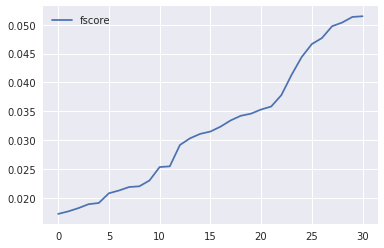

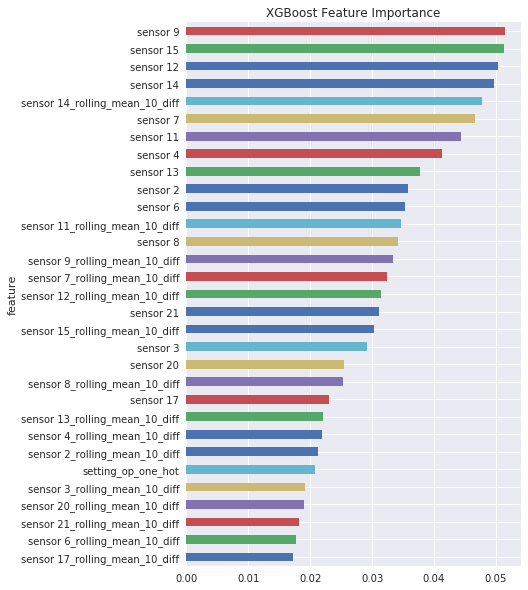

In [55]:
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
#plt.xlabel('relative importance')

# LSTM

In [56]:
train_X = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
train_Y = train_y.values.reshape(train_y.shape[0], 1)

test_X = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
test_Y = test_y.values.reshape(test_y.shape[0], 1)

In [57]:
train_X.shape

(160359, 1, 31)

In [58]:
batch_size = 256

model_LSTM = Sequential()
model_LSTM.add(LSTM(32, input_shape=(1,train_x.shape[1]), return_sequences=True))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(16, return_sequences=False))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(5, activation='relu'))
model_LSTM.add(BatchNormalization())
model_LSTM.add(Dense(1, activation='relu'))

opt = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model_LSTM.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

history = model_LSTM.fit(train_X, train_Y, epochs=30, batch_size=batch_size, validation_data=(test_X, test_Y), shuffle=True)

Train on 160359 samples, validate on 104897 samples
Epoch 1/30
160359/160359 [==============================] - 9s 55us/step - loss: 3794.4569 - mean_absolute_error: 51.0431 - val_loss: 264.0342 - val_mean_absolute_error: 10.3315
Epoch 2/30
160359/160359 [==============================] - 7s 46us/step - loss: 348.8001 - mean_absolute_error: 14.1024 - val_loss: 228.8162 - val_mean_absolute_error: 9.4202
Epoch 3/30
160359/160359 [==============================] - 7s 47us/step - loss: 323.7018 - mean_absolute_error: 13.2303 - val_loss: 213.9971 - val_mean_absolute_error: 8.8945
Epoch 4/30
160359/160359 [==============================] - 7s 46us/step - loss: 307.3494 - mean_absolute_error: 12.7581 - val_loss: 240.6806 - val_mean_absolute_error: 12.0963
Epoch 5/30
160359/160359 [==============================] - 7s 46us/step - loss: 291.9673 - mean_absolute_error: 12.2373 - val_loss: 223.7346 - val_mean_absolute_error: 10.7162
Epoch 6/30
160359/160359 [==============================] - 8s 4

/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


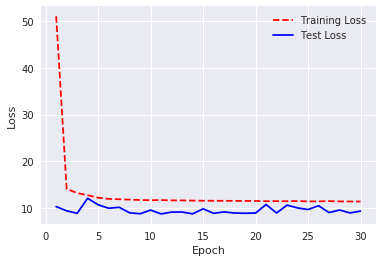

In [59]:
# Get training and test loss histories
training_loss = history.history['mean_absolute_error']
test_loss = history.history['val_mean_absolute_error']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [60]:
df_predictions, df_predictions_train, df_target, df_target_train = print_results(model_LSTM)

215.25
246.18
9.36
10.60
292.78
20.56
12.17
2.61
4795.19
199.69


# LSTM - With Time Dependecy

## All sequence

In [78]:
array_train = []
array_train_label = []

for x in df_train.groupby(['dataset_id', 'unit_id']).groups:
    df = (df_train.groupby(['dataset_id', 'unit_id']).get_group(x)).copy()
    train = df[columns_to_plot].copy()
    label_train = df['RUL'].copy()
    array_train_label.append(label_train)
    array_train.append(train.values)

array_test = []
array_test_label = []


for x in df_test.groupby(['dataset_id', 'unit_id']).groups:
    df = (df_test.groupby(['dataset_id', 'unit_id']).get_group(x)).copy()
    test = df[columns_to_plot].copy()
    label_test = df['RUL'].copy()
    array_test_label.append(label_test)
    array_test.append(test.values)


In [79]:
train_X = np.array(array_train)
test_X = np.array(array_test)

train_Y = np.array(array_train_label)
test_Y = np.array(array_test_label)

In [80]:
model_LSTM_Time = Sequential()
model_LSTM_Time.add(LSTM(32, batch_input_shape=(1, None, train_X[1].shape[1]), return_sequences=True, stateful=False))
model_LSTM_Time.add(Dropout(0.2))
model_LSTM_Time.add(LSTM(16, return_sequences=True, stateful=False))
#model_LSTM_Time.add(Dense(100, activation='relu'))
model_LSTM_Time.add(Dropout(0.2))
model_LSTM_Time.add(TimeDistributed(Dense(1, activation='relu')))

model_LSTM_Time.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

#model_LSTM_Time.fit(train_X, train_Y, epochs=5, validation_data=(test_X, test_Y), shuffle=True)

In [ ]:
predictions_ = []
predictions_train_ = []

for _ in range(20):
    
    print('Epoch number: {}'.format(_+1))
    
    for x, y in zip(train_X, train_Y):
        x = x.reshape([1, x.shape[0], x.shape[1]])
        y = y.values.reshape([1, y.shape[0], 1])
        
        model_LSTM_Time.fit(x, y, epochs=1, shuffle=False, verbose=0)
    
    if _ == 4 or _ == 9 or _ == 14 or _ == 19:
        predictions_ = []
        predictions_train_ = []
        predd = []
        predd_train = []

        for x, y in tqdm(zip(test_X, test_Y)):
            x = x.reshape(1, x.shape[0], x.shape[1])

            pred = model_LSTM_Time.predict(x, batch_size=1)
            predictions_.append(pred)

        for x, y in tqdm(zip(train_X, train_Y)):
            x = x.reshape(1, x.shape[0], x.shape[1])

            pred = model_LSTM_Time.predict(x, batch_size=1)
            predictions_train_.append(pred)

        for pred in predictions_:
            result = pd.DataFrame(pred[0,:,0])
            predd.append(result)

        for pred in predictions_train_:
            result = pd.DataFrame(pred[0,:,0])
            predd_train.append(result)

        predictions = pd.concat(predd, ignore_index=True)
        predictions_train = pd.concat(predd_train, ignore_index=True)

        df_predictions = df_test.join(pd.DataFrame(predictions.round()))
        df_predictions_train = df_train.join(pd.DataFrame(predictions_train.round()))

        df_predictions['error'] = df_predictions.apply(lambda df: error_function(df), axis=1)
        df_predictions_train['error'] = df_predictions_train.apply(lambda df: error_function(df), axis=1)

        df_predictions['score'] = df_predictions.apply(lambda df: score_function(df), axis=1)
        df_predictions_train['score'] = df_predictions_train.apply(lambda df: score_function(df), axis=1)

        MSE = mean_squared_error(df_predictions['RUL'], df_predictions[0])
        MSE_train = mean_squared_error(df_predictions_train['RUL'], df_predictions_train[0])

        print('Mean Squared Error on all test set: {0}, at epoch number: {1}'.format(MSE, _+1))
        print('Mean Squared Error on all training set: {0}, at epoch number: {1}'.format(MSE_train, _+1))

        df_target = df_predictions.sort_values('RUL', ascending=True).drop_duplicates(['dataset_id', 'unit_id']).sort_index().copy()
        df_target_train =  df_predictions_train.sort_values('RUL', ascending=True).drop_duplicates(['dataset_id', 'unit_id']).sort_index().copy()

        score_test = df_target['score'].sum()
        score_train = df_target_train['score'].sum()

        print('Score on test set: {0}, at epoch number: {1}'.format(score_test, _+1))
        print('Score on training set: {0}, at epoch number: {1}'.format(score_train, _+1))


In [ ]:
predictions_ = []

for x, y in tqdm(zip(test_X, test_Y)):
    x = x.reshape(1, x.shape[0], x.shape[1])
    pred = model_LSTM_Time.predict(x, batch_size=1)
    predictions_.append(pred)

predictions_train_ = []

for x, y in tqdm(zip(train_X, train_Y)):
    x = x.reshape(1, x.shape[0], x.shape[1])
    pred = model_LSTM_Time.predict(x, batch_size=1)
    predictions_train_.append(pred)
    


In [ ]:
predd = []

for pred in predictions_:
    result = pd.DataFrame(pred[0,:,0])
    predd.append(result)
    
predictions = pd.concat(predd, ignore_index=True)

predd_train = []

for pred in predictions_train_:
    result = pd.DataFrame(pred[0,:,0])
    predd_train.append(result)
    
predictions_train = pd.concat(predd_train, ignore_index=True)

In [ ]:
df_predictions = df_test.join(pd.DataFrame(predictions.round()))
df_predictions_train = df_train.join(pd.DataFrame(predictions_train.round()))

df_predictions['error'] = df_predictions.apply(lambda df: error_function(df), axis=1)
df_predictions_train['error'] = df_predictions_train.apply(lambda df: error_function(df), axis=1)

df_predictions['score'] = df_predictions.apply(lambda df: score_function(df), axis=1)
df_predictions_train['score'] = df_predictions_train.apply(lambda df: score_function(df), axis=1)

MSE = mean_squared_error(df_predictions['RUL'], df_predictions[0])
MSE_train = mean_squared_error(df_predictions_train['RUL'], df_predictions_train[0])

print('Mean Squared Error on all test set: {0}'.format(MSE))
print('Mean Squared Error on all training set: {0}'.format(MSE_train))

In [ ]:
df_target = df_predictions.sort_values('RUL', ascending=True).drop_duplicates(['dataset_id', 'unit_id']).sort_index().copy()
df_target_train =  df_predictions_train.sort_values('RUL', ascending=True).drop_duplicates(['dataset_id', 'unit_id']).sort_index().copy()

score_test = df_target['score'].sum()
score_train = df_target_train['score'].sum()

print('Score on test set: {0}'.format(score_test))
print('Score on training set: {0}'.format(score_train))

## With sequence length

In [61]:
array_train = []
array_train_label = []

length_sequence = 50

for x in df_train.groupby(['dataset_id', 'unit_id']).groups:
    
    df = (df_train.groupby(['dataset_id', 'unit_id']).get_group(x)).copy()
    train = df[columns_to_plot].copy()
    
    for i in range(len(train) - length_sequence + 1):
        array_train.append(train.iloc[i:i+length_sequence].values)
        array_train_label.append(df['RUL'].iloc[i:i+length_sequence])
        
array_test = []
array_test_label = []

length_sequence_test = 15

for x in df_test.groupby(['dataset_id', 'unit_id']).groups:
    
    df = (df_test.groupby(['dataset_id', 'unit_id']).get_group(x)).copy()
    test = df[columns_to_plot].copy()
    
    for i in range(len(test) - length_sequence_test + 1):
        array_test.append(test.iloc[i:i+length_sequence_test].values)
        array_test_label.append(df['RUL'].iloc[i:i+length_sequence_test])

In [62]:
train_X = np.array(array_train)
test_X = np.array(array_test)

train_Y = np.array(array_train_label)
test_Y = np.array(array_test_label)

train_Y = train_Y.reshape([train_Y.shape[0],train_Y.shape[1], 1])
test_Y = test_Y.reshape([test_Y.shape[0],test_Y.shape[1], 1])

In [63]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((125618, 50, 31), (94999, 15, 31), (125618, 50, 1), (94999, 15, 1))

In [64]:
model_LSTM_Time = Sequential()
model_LSTM_Time.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(None, train_X[1].shape[1])))
model_LSTM_Time.add(BatchNormalization())
model_LSTM_Time.add(Bidirectional(LSTM(64, return_sequences=True)))
model_LSTM_Time.add(BatchNormalization())
model_LSTM_Time.add(TimeDistributed(Dense(16, activation='relu')))
model_LSTM_Time.add(BatchNormalization())
model_LSTM_Time.add(Dropout(0.2))
model_LSTM_Time.add(TimeDistributed(Dense(1, activation='relu')))


opt = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
batch_size = 64
model_LSTM_Time.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

history = model_LSTM_Time.fit(train_X, train_Y, epochs=5, verbose=1, validation_data=(test_X, test_Y), shuffle=True, batch_size=batch_size)

Train on 125618 samples, validate on 94999 samples
Epoch 1/5
125618/125618 [==============================] - 534s 4ms/step - loss: 987.4309 - mean_absolute_error: 20.8554 - val_loss: 469.5883 - val_mean_absolute_error: 14.3899
Epoch 2/5
125618/125618 [==============================] - 610s 5ms/step - loss: 225.9757 - mean_absolute_error: 11.6675 - val_loss: 570.9231 - val_mean_absolute_error: 17.6745
Epoch 3/5
125618/125618 [==============================] - 599s 5ms/step - loss: 196.3911 - mean_absolute_error: 10.8754 - val_loss: 663.9070 - val_mean_absolute_error: 19.3713
Epoch 4/5
125618/125618 [==============================] - 597s 5ms/step - loss: 170.8640 - mean_absolute_error: 10.1317 - val_loss: 298.3525 - val_mean_absolute_error: 8.5422
Epoch 5/5
125618/125618 [==============================] - 599s 5ms/step - loss: 152.8868 - mean_absolute_error: 9.5570 - val_loss: 1505.0494 - val_mean_absolute_error: 35.5464


/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


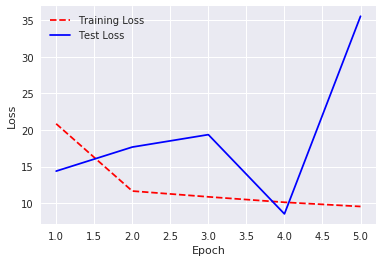

In [65]:
# Get training and test loss histories
training_loss = history.history['mean_absolute_error']
test_loss = history.history['val_mean_absolute_error']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [66]:
predictions_LSTM = model_LSTM_Time.predict(test_X, batch_size=batch_size)
predictions_train_LSTM = model_LSTM_Time.predict(train_X, batch_size=batch_size)

In [67]:
array_train_predictions = []
array_test_predictions = []


for x in df_train.groupby(['dataset_id', 'unit_id']).groups:
    
    df = (df_train.groupby(['dataset_id', 'unit_id']).get_group(x)).copy()
    train = df[columns_to_plot].copy()
    
    array_train_predictions_ = [[] for _ in range(len(train))]
    
    for i in range(len(train) - length_sequence + 1):
        for l, k in enumerate(predictions_train_LSTM[i]):
            array_train_predictions_[i+l].append((int(k)))
            
    array_train_predictions.append(array_train_predictions_)
        

for x in df_test.groupby(['dataset_id', 'unit_id']).groups:

    df = (df_test.groupby(['dataset_id', 'unit_id']).get_group(x)).copy()
    test = df[columns_to_plot].copy()

    array_test_predictions_ = [[] for _ in range(len(test))]

    for i in range(len(test) - length_sequence_test + 1):
        for l, k in enumerate(predictions_LSTM[i]):
            array_test_predictions_[i+l].append((int(k)))

    array_test_predictions.append(array_test_predictions_)

In [68]:
predictions_median = []
predictions_train_median = []

for i in range(len(array_train_predictions)):
    for j in array_train_predictions[i]:
        predictions_train_median.append(np.array(j).mean())

for i in range(len(array_test_predictions)):
    for j in array_test_predictions[i]:
        predictions_median.append(np.array(j).mean())


In [69]:
predictions = pd.DataFrame(predictions_median).values
predictions_train = pd.DataFrame(predictions_train_median).values

df_predictions = df_test.join(pd.DataFrame(predictions.round()))
df_predictions_train = df_train.join(pd.DataFrame(predictions_train.round()))

df_predictions.rename(columns={0: 'Prediction'}, inplace=True)
df_predictions_train.rename(columns={0: 'Prediction'}, inplace=True)

In [70]:
df_predictions = df_test.join(pd.DataFrame(predictions.round()))
df_predictions_train = df_train.join(pd.DataFrame(predictions_train.round()))

df_predictions.rename(columns={0: 'Prediction'}, inplace=True)
df_predictions_train.rename(columns={0: 'Prediction'}, inplace=True)

df_predictions['error'] = df_predictions.apply(lambda df: error_function(df), axis=1)
df_predictions_train['error'] = df_predictions_train.apply(lambda df: error_function(df), axis=1)

df_predictions['score'] = df_predictions.apply(lambda df: score_function(df), axis=1)
df_predictions_train['score'] = df_predictions_train.apply(lambda df: score_function(df), axis=1)

MSE_all = mean_squared_error(df_predictions['RUL'], df_predictions['Prediction'])
MSE_train_all = mean_squared_error(df_predictions_train['RUL'], df_predictions_train['Prediction'])

print('{:.2f}'.format(MSE_all))
print('{:.2f}'.format(MSE_train_all))

MAE_all = mean_absolute_error(df_predictions['RUL'], df_predictions['Prediction'])
MAE_train_all = mean_absolute_error(df_predictions_train['RUL'], df_predictions_train['Prediction'])

print('{:.2f}'.format(MAE_all))
print('{:.2f}'.format(MAE_train_all))

##################
df_target = df_predictions.sort_values('RUL', ascending=True).drop_duplicates(['dataset_id','unit_id']).sort_index().copy()
df_target_train =  df_predictions_train.sort_values('RUL', ascending=True).drop_duplicates(['dataset_id', 'unit_id']).sort_index().copy()

MSE = mean_squared_error(df_target['RUL'], df_target['Prediction'])
MSE_train = mean_squared_error(df_target_train['RUL'], df_target_train['Prediction'])

print('{:.2f}'.format(MSE))
print('{:.2f}'.format(MSE_train))

MAE = mean_absolute_error(df_target['RUL'], df_target['Prediction'])
MAE_train = mean_absolute_error(df_target_train['RUL'], df_target_train['Prediction'])

print('{:.2f}'.format(MAE))
print('{:.2f}'.format(MAE_train))

score_test = df_target['score'].sum()
score_train = df_target_train['score'].sum()

print('{:.2f}'.format(score_test))
print('{:.2f}'.format(score_train))
    

2151.27
2848.04
39.25
42.07
6329.09
13523.35
69.07
100.05
3456380.72
28003427.84


# MLP

In [92]:
train_X = train_x.values
train_Y = train_y.values
test_X = test_x.values
test_Y = test_y.values

In [93]:
batch_size = 512

model_MLP = Sequential()

model_MLP.add(Dense(16, input_dim=train_X.shape[1], activation='relu'))
model_MLP.add(BatchNormalization())
model_MLP.add(Dropout(0.2))
model_MLP.add(Dense(4, activation='relu'))
model_MLP.add(BatchNormalization())
model_MLP.add(Dropout(0.2))
model_MLP.add(Dense(1, activation='relu'))

opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model_MLP.compile(loss='mean_squared_error', optimizer=opt,  metrics=['mae'])

history = model_MLP.fit(train_X, train_Y, epochs=1, validation_data=(test_X, test_Y), batch_size=batch_size)

Train on 160359 samples, validate on 104897 samples
Epoch 1/2
160359/160359 [==============================] - 5s 29us/step - loss: 4603.1638 - mean_absolute_error: 57.6547 - val_loss: 266.4341 - val_mean_absolute_error: 10.9404
Epoch 2/2
160359/160359 [==============================] - 3s 18us/step - loss: 866.2905 - mean_absolute_error: 23.1264 - val_loss: 260.7561 - val_mean_absolute_error: 10.3344


/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


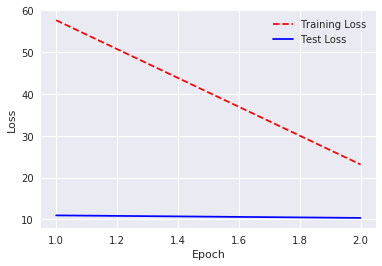

In [94]:
# Get training and test loss histories
training_loss = history.history['mean_absolute_error']
test_loss = history.history['val_mean_absolute_error']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [95]:
df_predictions, df_predictions_train, df_target, df_target_train = print_results(model_MLP)

260.79
359.62
10.33
13.03
439.99
0.00
15.65
0.00
23917.92
0.00


# PCA

In [100]:
PCA_train = PCA(n_components=3).fit(train_x.values)

train_PCA = PCA_train.transform(train_x.values)
test_PCA = PCA_train.transform(test_x.values)

/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


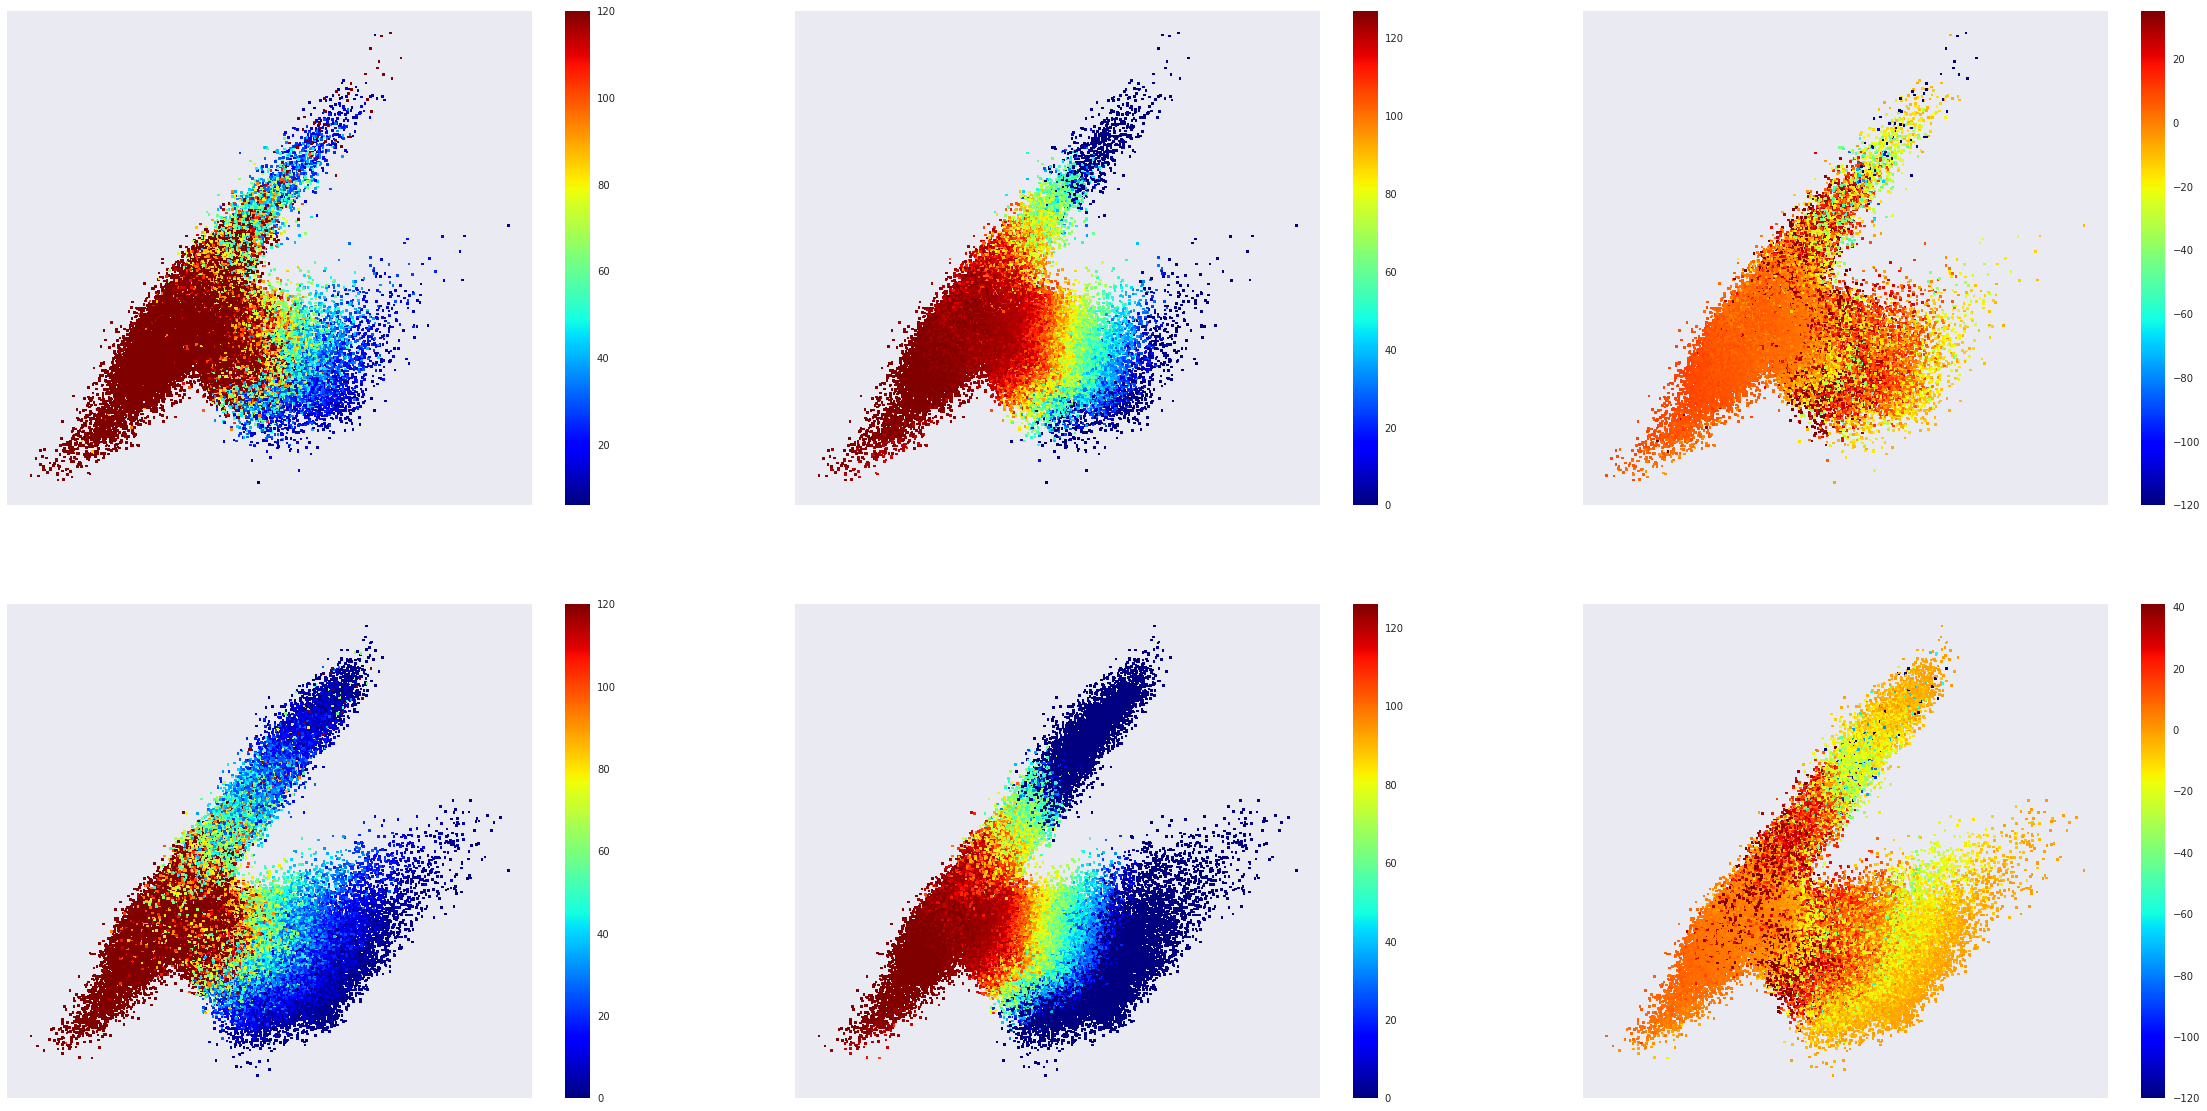

In [101]:
plt.figure(figsize=(40,20))

plt.subplot(2,3,1)
plot_figure(test_PCA, df_test['RUL'])

plt.subplot(2,3,2)
plot_figure(test_PCA, df_predictions['Prediction'].astype(int))

plt.subplot(2,3,3)
plot_figure(test_PCA, df_predictions['error'])

plt.subplot(2,3,4)
plot_figure(train_PCA, df_train['RUL'])

plt.subplot(2,3,5)
plot_figure(train_PCA, df_predictions_train['Prediction'].astype(int))

plt.subplot(2,3,6)
plot_figure(train_PCA, df_predictions_train['error'])

# Regression Visualization

/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


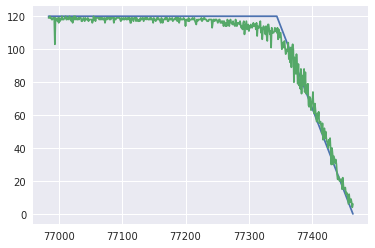

In [108]:
df_predictions_train[(df_predictions_train.dataset_id == 'FD003') & (df_predictions_train.unit_id == 10)]['RUL'].plot()
df_predictions_train[(df_predictions_train.dataset_id == 'FD003') & (df_predictions_train.unit_id == 10)]['Prediction'].plot()
#df_predictions_train[(df_predictions_train.dataset_id == 'FD002') & (df_predictions_train.unit_id == 1)]['error'].plot()

/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


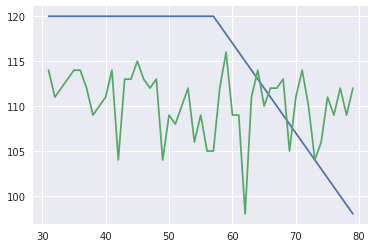

In [110]:
df_predictions[(df_predictions.dataset_id == 'FD001') & (df_predictions.unit_id == 2)]['RUL'].plot()
df_predictions[(df_predictions.dataset_id == 'FD001') & (df_predictions.unit_id == 2)]['Prediction'].plot()
#df_predictions[(df_predictions.dataset_id == 'FD003') & (df_predictions.unit_id == 20)]['score'].plot()

# UMAP

In [66]:
UMAP_Train = umap.UMAP().fit_transform(train_x.values)
UMAP_Test = umap.UMAP().fit_transform(test_x.values)

/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


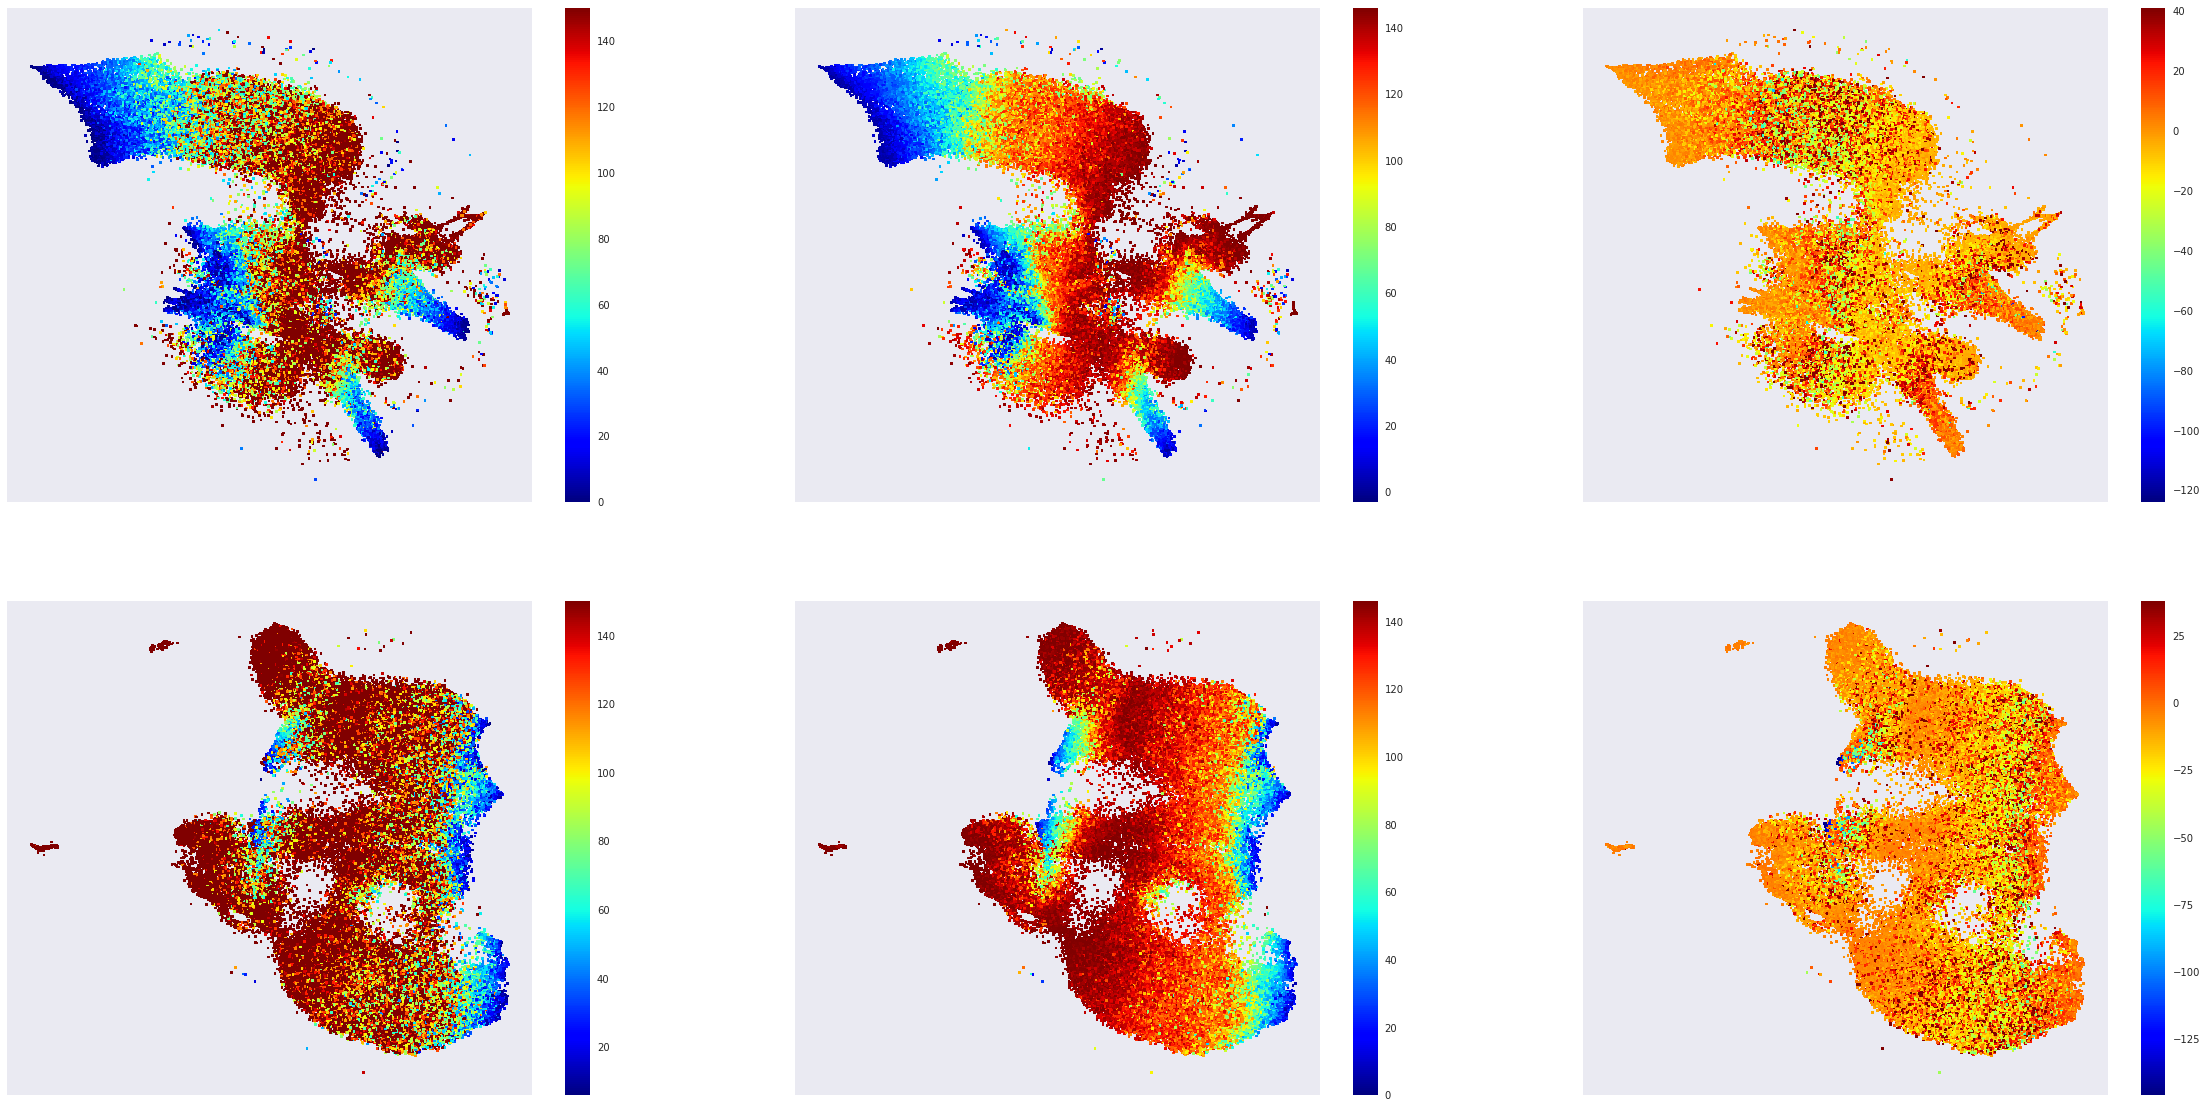

In [67]:
plt.figure(figsize=(40,20))

plt.subplot(2,3,1)
plot_figure(UMAP_Train, df_predictions_train['RUL'])


plt.subplot(2,3,2)
plot_figure(UMAP_Train, df_predictions_train['Prediction'])


plt.subplot(2,3,3)
plot_figure(UMAP_Train, df_predictions_train['error'])


plt.subplot(2,3,4)
plot_figure(UMAP_Test, df_predictions['RUL'])


plt.subplot(2,3,5)
plot_figure(UMAP_Test, df_predictions['Prediction'])


plt.subplot(2,3,6)
plot_figure(UMAP_Test, df_predictions['error'])
